# Stock Data Analysis

This notebook analyzes stock market data using various machine learning models, providing insights into feature importance, correlations, and model performance.

## Load Modules and Data

In [2]:
from src.modules import *
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Feature Importances Visualization

### Extract Feature Importances

In [3]:

def plot_feature_importances(model, feature_names, title):
    """
    Plots the feature importances for tree-based models.
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(12, 6))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), np.array(feature_names)[indices], rotation=90)
    plt.show()


### Feature Importances for XGBoost and RandomForest

I0000 00:00:1734640184.524893  413617 cuda_dnn.cc:529] Loaded cuDNN version 90300


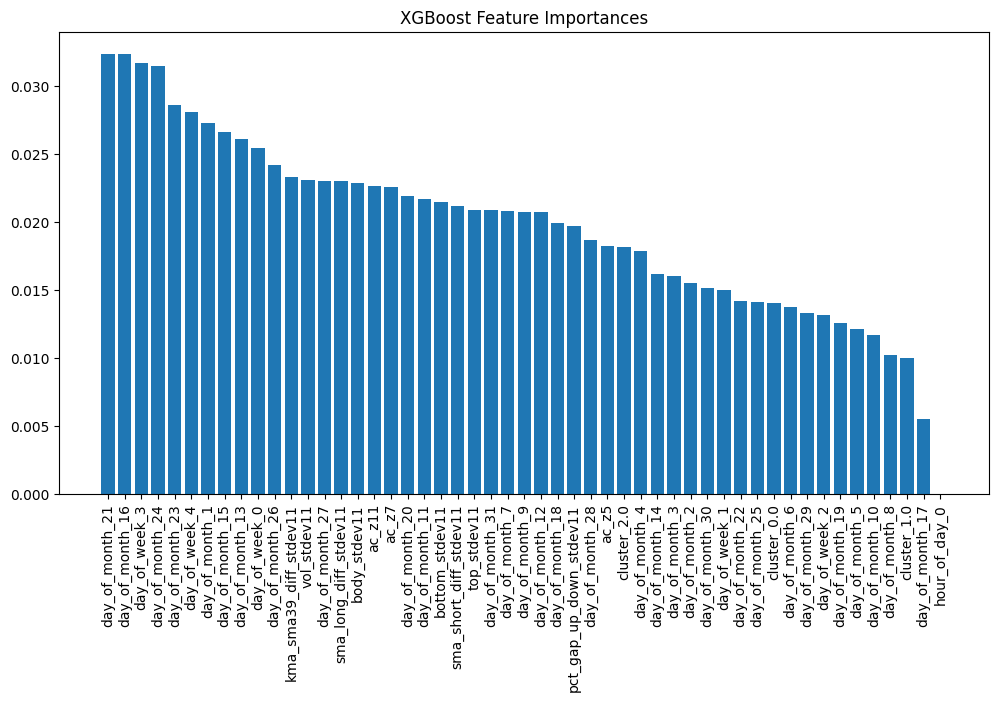

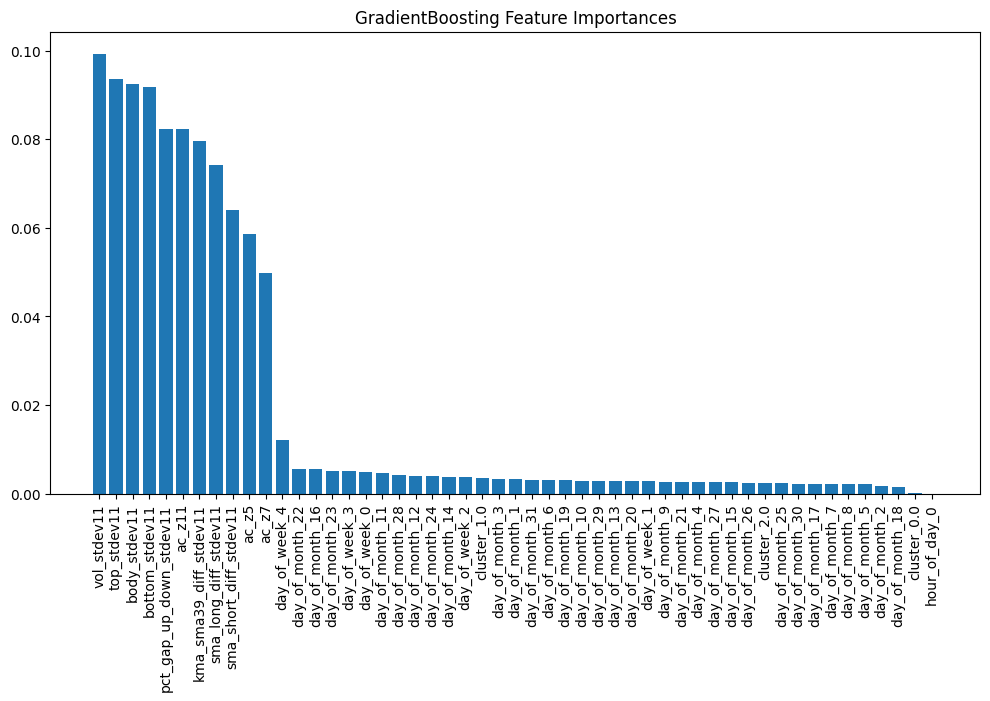

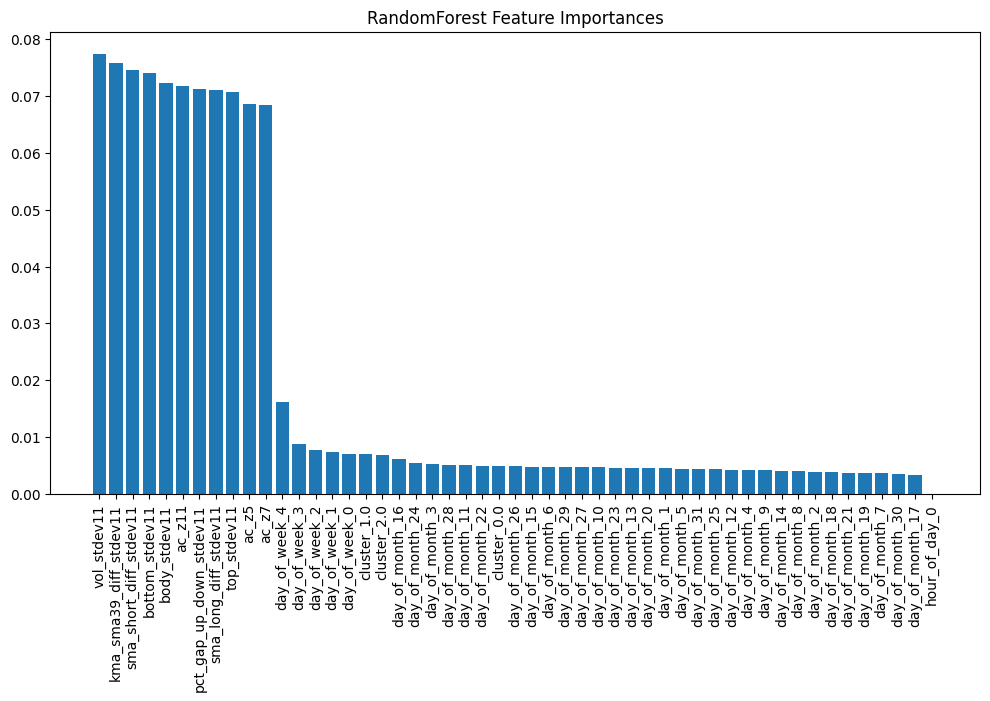

In [5]:

# Example usage
curr_prediction, models, feature_names, classification_reports = model('TSLA', '1d')

for model_name, fitted_model in models.items():
    if model_name in ['XGBoost', 'RandomForest', 'GradientBoosting']:
        plot_feature_importances(fitted_model, feature_names, f"{model_name} Feature Importances")


## Correlation Matrix

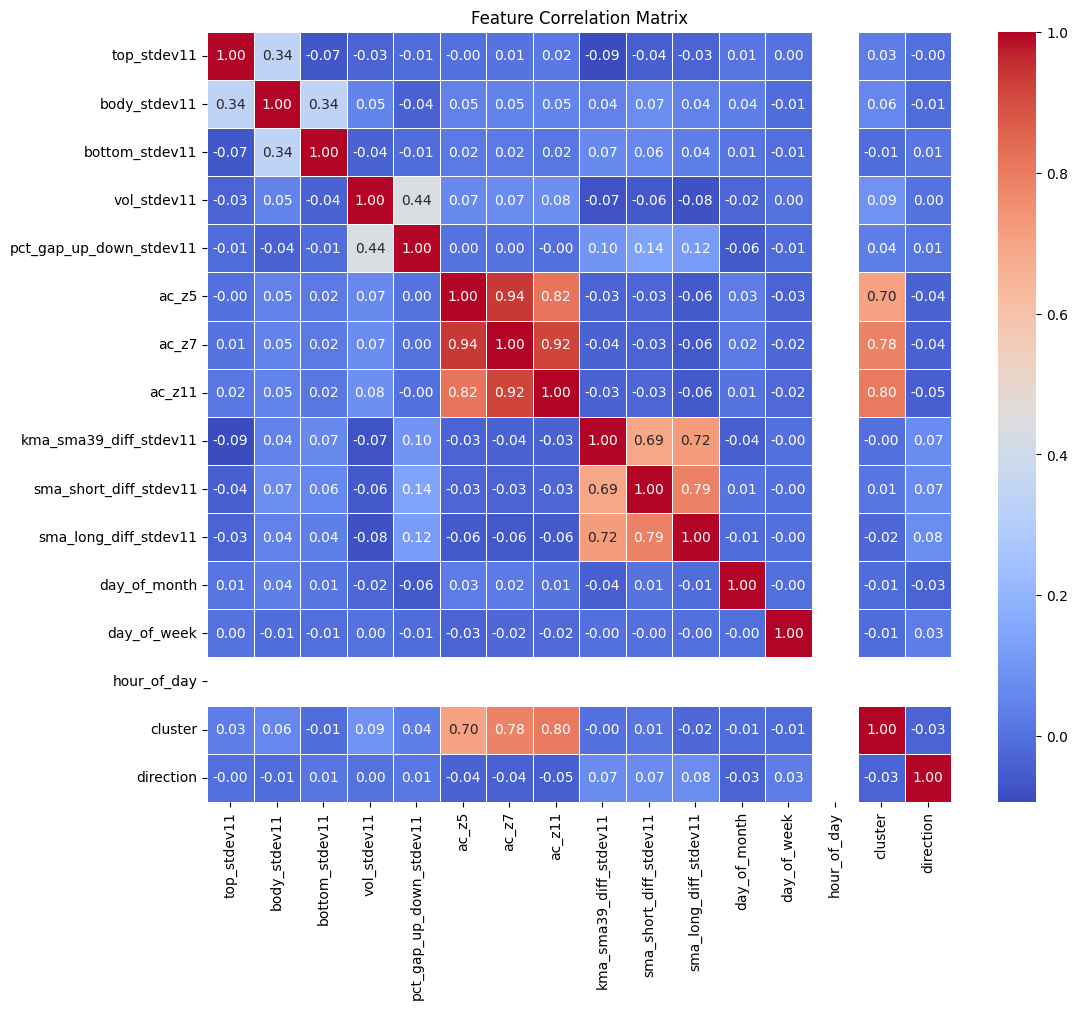

In [6]:

def plot_correlation_matrix(data, title):
    """
    Plots the correlation matrix heatmap.
    """
    corr = data.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.show()

# Load transformed data
data = load_model_df('TSLA', '1d')
plot_correlation_matrix(data, "Feature Correlation Matrix")


## Model Performance Summary

In [7]:
# Generate summary table
summary_table = predictions('tsla')

TSLA 5m Interval Timestamp: 2024-12-19 15:30:22


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,up,static,up,up,static
kelly_1:2.5,0.171546,0.338004,0.15942,0.143739,0.064196
prob_up,0.388563,0.359687,0.41263,0.625,0.0
prob_static,0.27137,0.425335,0.225006,0.25,0.0
prob_down,0.340068,0.214979,0.362363,0.125,1.0
precision,0.408247,0.527145,0.399586,0.388385,0.331568
recall,0.392079,0.600798,0.382178,0.423762,1.0
f1,0.4,0.561567,0.390688,0.405303,0.498012
support,"[505.0, 501.0, 505.0]","[505.0, 501.0, 505.0]","[505.0, 501.0, 505.0]","[505.0, 501.0, 505.0]","[505.0, 501.0, 505.0]"


TSLA 15m Interval Timestamp: 2024-12-19 15:30:44


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,up,up,up,up,static
kelly_1:2.5,0.125,0.20411,0.134211,0.16,0.063872
prob_up,0.461463,0.579492,0.508545,0.625,0.0
prob_static,0.138189,0.107563,0.160288,0.125,0.0
prob_down,0.400349,0.312945,0.331167,0.25,1.0
precision,0.375,0.431507,0.381579,0.4,0.331337
recall,0.321429,0.375,0.345238,0.380952,1.0
f1,0.346154,0.401274,0.3625,0.390244,0.497751
support,"[168.0, 166.0, 167.0]","[168.0, 166.0, 167.0]","[168.0, 166.0, 167.0]","[168.0, 166.0, 167.0]","[168.0, 166.0, 167.0]"


TSLA 1h Interval Timestamp: 2024-12-19 15:30:53


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,up,up,up,down,static
kelly_1:2.5,0.152445,0.179649,0.153206,0.205187,0.067512
prob_up,0.479439,0.58389,0.43168,0.375,0.0
prob_static,0.232152,0.150644,0.254604,0.125,0.0
prob_down,0.288409,0.265466,0.313717,0.5,1.0
precision,0.394604,0.414035,0.395147,0.432277,0.333937
recall,0.423146,0.426763,0.412297,0.272727,1.0
f1,0.408377,0.420303,0.40354,0.334448,0.500679
support,"[553.0, 553.0, 550.0]","[553.0, 553.0, 550.0]","[553.0, 553.0, 550.0]","[553.0, 553.0, 550.0]","[553.0, 553.0, 550.0]"


TSLA 1d Interval Timestamp: 2024-12-19 15:31:17


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,down,down,down,up,static
kelly_1:2.5,0.066667,0.053333,0.127059,0.096414,0.068611
prob_up,0.368447,0.261726,0.340213,0.375,0.0
prob_static,0.247257,0.177863,0.2437,0.25,0.0
prob_down,0.384297,0.560411,0.416087,0.375,1.0
precision,0.333333,0.32381,0.376471,0.354582,0.334722
recall,0.280335,0.284519,0.267782,0.370833,1.0
f1,0.304545,0.302895,0.312958,0.362525,0.501561
support,"[240.0, 241.0, 239.0]","[240.0, 241.0, 239.0]","[240.0, 241.0, 239.0]","[240.0, 241.0, 239.0]","[240.0, 241.0, 239.0]"


TSLA 1wk Interval Timestamp: 2024-12-19 15:31:28


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,up,up,up,down,static
kelly_1:2.5,0.15,0.056522,0.25,0.12,0.056944
prob_up,0.733276,0.59913,0.367741,0.25,0.0
prob_static,0.101826,0.125386,0.302164,0.125,0.0
prob_down,0.164897,0.275484,0.330095,0.625,1.0
precision,0.392857,0.326087,0.464286,0.371429,0.326389
recall,0.44898,0.306122,0.530612,0.270833,1.0
f1,0.419048,0.315789,0.495238,0.313253,0.492147
support,"[49.0, 47.0, 48.0]","[49.0, 47.0, 48.0]","[49.0, 47.0, 48.0]","[49.0, 47.0, 48.0]","[49.0, 47.0, 48.0]"


TSLA 1mo Interval Timestamp: 2024-12-19 15:31:33


,XGBoost,GradientBoosting,RandomForest,KNN,LSTM
prediction,up,up,up,up,static
kelly_1:2.5,0.125,0.144444,0.144444,0.16,0.02
prob_up,0.932252,0.997903,0.580899,0.5,0.0
prob_static,0.025129,0.000728,0.149315,0.125,0.0
prob_down,0.042619,0.001369,0.269786,0.375,1.0
precision,0.375,0.388889,0.388889,0.4,0.3
recall,0.545455,0.636364,0.636364,0.545455,1.0
f1,0.444444,0.482759,0.482759,0.461538,0.461538
support,"[11.0, 9.0, 10.0]","[11.0, 9.0, 10.0]","[11.0, 9.0, 10.0]","[11.0, 9.0, 10.0]","[11.0, 9.0, 10.0]"


### **Conclusions**

1. **Gradient Boosting Shows Strong Performance Across Intervals**:
   - Gradient Boosting consistently achieves higher precision, recall, and F1 scores compared to other models, particularly in shorter time intervals like 5 minutes and 15 minutes.


2. **LSTM Performance on Static Predictions**:
   - The LSTM model predicts "static" in most intervals and achieves perfect recall (1.0), but its precision remains low, indicating potential over-prediction of the "static" class.


3. **Kelly Criterion Indicates Conservative Probabilities**:
   - The Kelly Criterion values are generally low, indicating that the probabilities predicted by models are not confident enough to make aggressive bets across intervals.

---

### **Next Steps**

1. **Enhance LSTM Model Architecture**:
   - Improve the LSTM model by:
     - Incorporating more complex layers (e.g., Bidirectional LSTM).
     - Fine-tuning the hyperparameters such as batch size, learning rate, and dropout rate.
     - Augmenting the dataset to balance predictions across "up," "static," and "down."


2. **Focus on Short-Term Intervals**:
   - Given the stronger performance of models in shorter intervals (e.g., 5m and 15m), prioritize optimizing predictions in these intervals for actionable short-term trading strategies.


3. **Evaluate and Adjust Thresholds**:
   - Adjust classification thresholds for models, particularly the LSTM and Gradient Boosting models, to improve precision without overly sacrificing recall. This can balance the trade-offs between false positives and false negatives.
